In [1]:
library('tidyverse')
library('ggrepel')

org_opts <- options()

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
cor_tbl <-
    read_csv('ihc-vs-exp_log-correlations.csv')

cor_tbl %>%
    head()

Rows: 18480 Columns: 11
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): method, alternative, ihc_metric, ihc_region, gene_symbol
dbl (6): estimate, statistic, p.value, parameter, conf.low, conf.high

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


estimate,statistic,p.value,parameter,conf.low,conf.high,method,alternative,ihc_metric,ihc_region,gene_symbol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
0.49921188,1.7284135,0.11797843,9,-0.14369460,0.8457997,Pearson's product-moment correlation,two.sided,CD3+ cells/mm^2,Peritumor,A2M
-0.07856785,-0.2364344,0.81838885,9,-0.64790646,0.5470921,Pearson's product-moment correlation,two.sided,CD3+ cells/mm^2,Peritumor,ACVR1C
0.20554979,0.6301042,0.54429033,9,-0.44978568,0.7170140,Pearson's product-moment correlation,two.sided,CD3+ cells/mm^2,Peritumor,ADAM12
0.49949626,1.7297253,0.11773580,9,-0.14332355,0.8459075,Pearson's product-moment correlation,two.sided,CD3+ cells/mm^2,Peritumor,ADGRE1
0.24192944,0.7480088,0.47354657,9,-0.41871220,0.7351186,Pearson's product-moment correlation,two.sided,CD3+ cells/mm^2,Peritumor,ADM
0.56483476,2.0534367,0.07022217,9,-0.05299737,0.8699458,Pearson's product-moment correlation,two.sided,CD3+ cells/mm^2,Peritumor,ADORA2A


In [3]:
cor_tbl %>%
    distinct(`ihc_metric`)

ihc_metric
<chr>
CD3+ cells/mm^2
CD4+ cells/mm^2
CD8 + cells/mm^2
CD20 + cells/mm^2
MECA-79 + cells/mm^2
CD56 + cells/mm^2
FOXP-3 + cells/mm^2
CD68 + cells/mm^2
CD45 + cells/mm^2


In [4]:
cd8tumor_cor_tbl <-
    cor_tbl %>%
    filter(`ihc_metric` == 'CD8 + cells/mm^2') %>%
    mutate(
        `mlog10p`=-log10(`p.value`),
        `fdr`=p.adjust(`p.value`, method='fdr'),
        `label`=case_when(
            `mlog10p` > 1.5 ~ `gene_symbol`,
            TRUE ~ ''
        )
    ) %>%
    arrange(`p.value`)


cd8tumor_cor_tbl %>%
    head() %>%
    t()

estimate,0.8714409,0.8243525,0.8172588,0.7806668,-0.7725179,-0.7053015
statistic,5.329909,4.368767,4.254556,3.747515,-3.649731,-2.984740
p.value,0.0004747415,0.0018003186,0.0021281380,0.0045721657,0.0053197488,0.0153311919
parameter,9,9,9,9,9,9
conf.low,0.5690291,0.4440777,0.4264545,0.3400275,-0.9378021,-0.9171409
conf.high,0.9662193,0.9529739,0.9509350,0.9402298,-0.3217433,-0.1827443
method,Pearson's product-moment correlation,Pearson's product-moment correlation,Pearson's product-moment correlation,Pearson's product-moment correlation,Pearson's product-moment correlation,Pearson's product-moment correlation
alternative,two.sided,two.sided,two.sided,two.sided,two.sided,two.sided
ihc_metric,CD8 + cells/mm^2,CD8 + cells/mm^2,CD8 + cells/mm^2,CD8 + cells/mm^2,CD8 + cells/mm^2,CD8 + cells/mm^2
ihc_region,Tumor,Tumor,Tumor,Tumor,Tumor,Tumor
gene_symbol,MAGEC1,MAGEB2,MAGEC2,IGF2R,JAK2,IL11RA


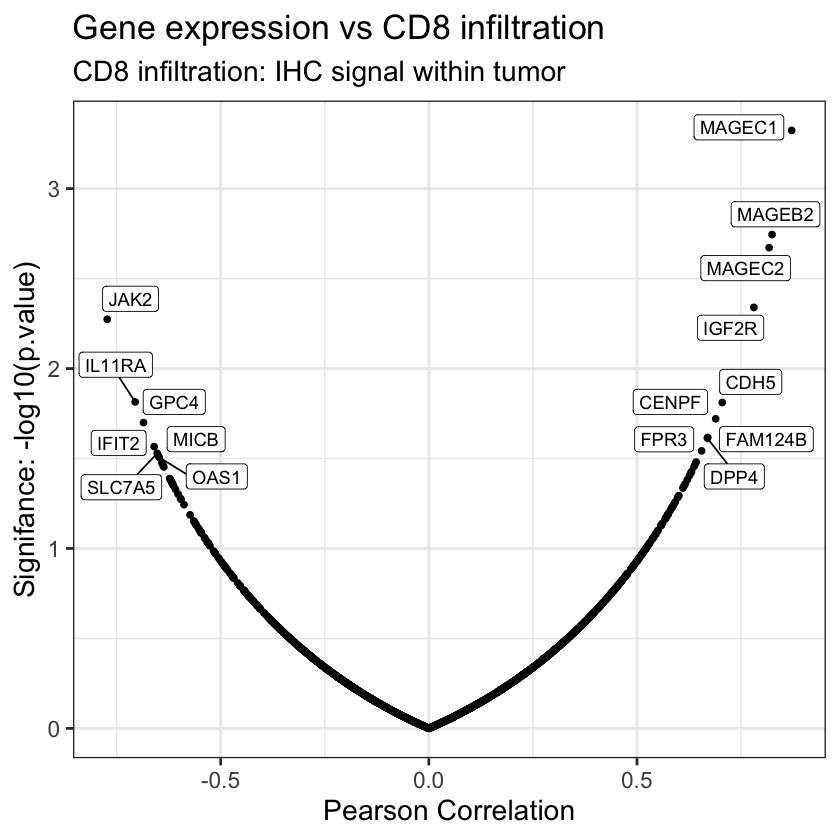

In [5]:
cd8tumor_cor_tbl %>%
    ggplot(aes(x=`estimate`, y=`mlog10p`)) +
        geom_point() +
        geom_label_repel(aes(label=`label`), max.overlaps=Inf) +
        theme_bw(base_size=17) +
        labs(
            title='Gene expression vs CD8 infiltration',
            subtitle='CD8 infiltration: IHC signal within tumor',
            x='Pearson Correlation',
            y='Signifance: -log10(p.value)'
        )

In [6]:
cd8tumor_cor_tbl %>%
    filter(`estimate` > 0) %>%
    head(50) %>%
    pull(`gene_symbol`)

[1] "MAGEC1"    "MAGEB2"    "MAGEC2"    "IGF2R"     "CDH5"      "CENPF"    
 [7] "FAM124B"   "DPP4"      "FPR3"      "TBC1D10B"  "ULBP2"     "CCL2"     
[13] "ERO1A"     "VEGFA"     "OLFML2B"   "MAP3K7"    "NECTIN2"   "PSMB5"    
[19] "CD68"      "MAGEA3/A6" "STC1"      "TNFSF10"   "THY1"      "DTX3L"    
[25] "RASAL1"    "CCL8"      "GBP1"      "ERCC3"     "G6PD"      "CD4"      
[31] "TWF1"      "A2M"       "JAG1"      "PSMB10"    "ITGB3"     "TNFSF12"  
[37] "ITGB2"     "JAG2"      "IL1A"      "EIF5AL1"   "FCGR2A"    "IL2RB"    
[43] "CD84"      "GBP2"      "FCGR1A"    "MARCO"     "EIF5AL1"   "APOE"     
[49] "CYBB"      "TYMS"

In [7]:
cd8tumor_cor_tbl %>%
    filter(`estimate` < 0) %>%
    head(50) %>%
    pull(`gene_symbol`)

[1] "JAK2"    "IL11RA"  "GPC4"    "IFIT2"   "SLC7A5"  "MICB"    "OAS1"   
 [8] "VEGFB"   "CDH2"    "F2RL1"   "DKK1"    "STAT2"   "APC"     "WNT11"  
[15] "NFKB1"   "MAP3K5"  "TFRC"    "EGFR"    "IL18R1"  "PRKCA"   "SOCS1"  
[22] "MX1"     "CDH11"   "HDAC3"   "ICAM3"   "IL16"    "PIK3R1"  "SDHA"   
[29] "RPTOR"   "PRR5"    "DUSP2"   "SDHA"    "IFIH1"   "MGMT"    "GOT2"   
[36] "CCL4"    "CCNA1"   "IHH"     "GHR"     "ICOS"    "OAS3"    "CCL3/L1"
[43] "IRF8"    "HERC6"   "ABCF1"   "NFKBIA"  "SHC2"    "RSAD2"   "CCL21"  
[50] "MICA"